(prob602)=
# Problema 6.2

Determinar la ganancia y la banda proporcional de u controlador neumático proporcional de acción directa con una escala de 0-120 ℃, si la variación en la salida pasa de 20 a 100 kPa cuando la temperatura aumenta desde 95 a ℃. Si se cambia la banda proporcional a 50 %, determinar la ganancia y la variación de temperatura requerida para un cambio total en la salida.

---

**Solución**

Un posible diagrama del sistema de control propuesto es el siguiente:

![prob602-esquema.svg](./img/prob602-esquema.svg)

La temperatura del tanque $T (t)$ la mide un sensor de temperatura. La
respuesta de este medidor es $T_m (t)$, esta variable se alimenta al
controlador que la compara con el valor de consigna $T_{sp} (t)$. La acción de control $c (t)$ se envía a la válvula neumática que modifica el caudal de agua caliente $Q (t)$. Al varial el caudal de agua caliente varía la temperatura del tanque. Si el sistema de control funciona correctamente la diferencia entre esta temperatura y la consigna debe ser cada vez menor, si no se producen cambios o perturbaciones.

Se puede plantear un diagrama de bloques que representa la instalación
anterior:

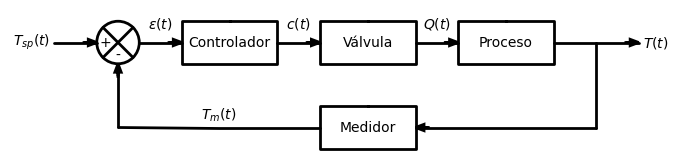

In [22]:
using PyCall, LaTeXStrings

schemdraw = pyimport("schemdraw")
dsp = pyimport("schemdraw.dsp")
#elm = pyimport("schemdraw.elements")
#lines = pyimport("schemdraw.elements.lines")

d = schemdraw.Drawing(unit=1, fontsize=10)
d.add(dsp.Arrow().right().label(L"T_{sp}(t)", "left"))
suma = d.add(dsp.Mixer(W="+", S="-").anchor("W"))
d.add(dsp.Arrow().label(L"\epsilon(t)", "top").right())
control = d.add(dsp.Box(h=1, w=2.25).label("Controlador").anchor("W"))
d.add(dsp.Arrow().label(L"c(t)", "top").right().at(control.E))
valvula = d.add(dsp.Box(h=1, w=2.25).label("Válvula").anchor("W"))
d.add(dsp.Arrow().label(L"Q(t)", "top").right().at(valvula.E))
proceso = d.add(dsp.Box(h=1, w=2.25).label("Proceso").anchor("W"))
d.add(dsp.Line().right().at(proceso.E))
dot = d.add(dsp.Dot(radius=0))
d.push()
d.add(dsp.Arrow().right().at(dot.center).label(L"T(t)", "right"))
d.pop()
d.add(dsp.Line().down().at(dot.center).length(2))
d.add(dsp.Arrow().left().length(4.25))
medidor = d.add(dsp.Box(h=1, w=2.25).label("Medidor").anchor("E"))
d.add(dsp.Line().label(L"T_m(t)", "top").left().at(medidor.W).tox(suma.S))
d.add(dsp.Arrow().up().to(suma.S))

d.draw(show=false)

El controlador es proporcional, lo que significa que: 

$$\begin{aligned}
  \text{Error: } & \varepsilon (t) = T_{sp} (t) - T_m (t) & \\
  \text{Acción de control: } & c (t) = K_c \varepsilon (t) & \end{aligned}$$
  
donde $K_c$ es la ganancia del controlador. La ganancia del controlador
será, por tanto, la pendiente de la recta siguiente:

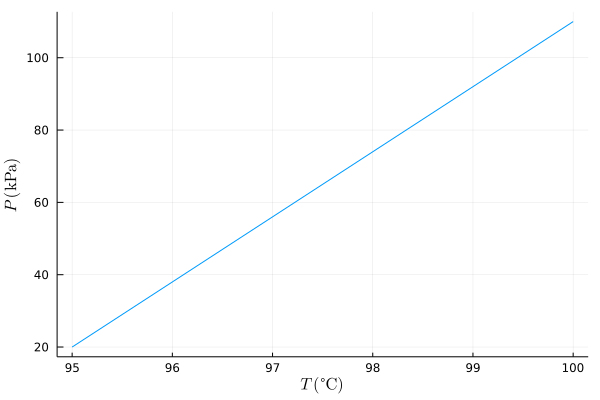

In [46]:
using Plots

plot([95, 100], [20, 110], xlim=[95,100],
    xlabel=L"T\ \mathrm{(}\degree \mathrm{C)}", ylabel=L"P\ \mathrm{(kPa)}",
    legend=false)

Lo que supone:

$$K_c = \frac{P_{\max} - P_{\min}}{T_{\max} - T_{\min}} = \frac{100
   \ \mathrm{kPa} - 20\  \mathrm{kPa}}{110\text{ ºC} - 95\text{ ºC}} =
   5.33\ \mathrm{kPa} /℃$$
   
La banda proporcional (BP) es el porcentaje de uso del controlador. En este caso, aunque el controlador tiene capacidad de controlar temperaturas entre 0 y 120 ℃ se utiliza para controlar temperaturas entre 95 y 110 ℃. Eso supone que:

$$\mathrm{BP} = 100 \frac{110\text{ ºC} - 95\text{ ºC}}{120\text{ ºC} - 0\text{ ºC}} = 12.5\%$$
   
Si la banda proporcional es de 50%, el incremento de temperaturas controlado será:

$$\Delta T = \frac{\mathrm{BP}\ 120\text{ ºC}}{100} = 60℃$$

Por tanto la ganancia del controlador será:

$$K_c = \frac{100\ \mathrm{kPa} - 20\ \mathrm{kPa}}{60\text{ ºC}} = 0.133
   \mathrm{kPa} /℃$$